In [1]:
"""
Численное решение ОДУ экстраполяционным методом Адамса
"""


import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline


#начальные условия
t0 = 0
T = 65
y0 = z0 = 155

#начальный шаг
h0 = 0.1

#точность
eps = 0.0001


#количество точек
def Count(h):
    return math.ceil((T - t0)/h)


#исходные уравнения
def DY(y):
    return 0.01*(130 - y)*(y - 147)


def DZ(t, z):
    return 0.01*(130 - z)*(z - 147) - 2*math.sin(t/3)


#функция, принимающая значение DY и DZ в зависимости от параметра p
def D(t, y, p):
    if p == 1:
        return DY(y)
    elif p == 2:
        return DZ(t, y)

    
#экстраполяционный метод Адамса 4-го порядка, первые 4 значения найдем по методу РК 4-го порядка
def Adams(t0, h, y0, p):
    N = Count(h)
    Y = np.zeros(N+1)
    t = np.zeros(N+1)
    h = 65/N
    Y[0] = y0
    t[0] = t0
    for i in range(0,3):
        k1 = D(t[i], Y[i], p)
        k2 = D(t[i] + h/2, Y[i] + h*k1/2, p)
        k3 = D(t[i] + h/2, Y[i] + h*k2/2, p)
        k4 = D(t[i] + h, Y[i] + h*k3, p)
        Y[i+1] = Y[i] + h*(k1 + 2*k2 + 2*k3 + k4)/6
        t[i+1] = t[i] + h
    for i in range(3, N):
        Y[i+1] = Y[i] + h*(55*D(t[i], Y[i], p) - 59*D(t[i-1], Y[i-1], p) + 37*D(t[i-2], Y[i-2], p) - 9*D(t[i-3], Y[i-3], p))/24
        t[i+1] = t[i] + h
    return Y


#правило Рунге двойного пересчета
def Runge(t0, h, y0, p):
    N = Count(h)
    h = 65/N
    R = np.zeros(N+1)
    for i in range(N+1):
        R[i] = abs(Adams(t0, h/2, y0, p)[2*i] - Adams(t0, h, y0, p)[i])/(2**4 -1)
    return R


#функция для нахождения количества точек - для достижения заданной точности
def Accuracy(t0, y0, p, eps):
    h = 1
    R = Runge(t0, h, y0, p)
    R1 = max(R)
    while (R1 > eps):
        h1 = h/2
        R1 = max(Runge(t0, h1, y0, p))
        h = h1
    return h


#массив точек
def Dots(t0, h):
    N = Count(h)
    h = 65/N
    t = np.zeros(N+1)
    t[0] = t0
    for i in range(0, N):
        t[i+1] = t[i] + h
    return t


In [2]:
#количество точек для достижения заданной точности
hy = Accuracy(0, 155, 1, 0.0001)
hz = Accuracy(0, 155, 2, 0.0001)
print("Шаг для y' = ", hy)
print("Шаг для z' = ", hz)

Шаг для y' =  0.5
Шаг для z' =  0.25


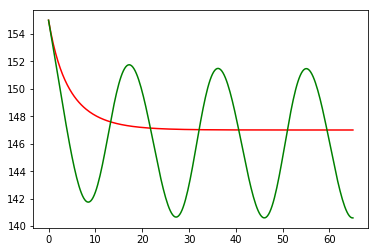

In [3]:
#построим графики, берем меньший шаг hz = 0.25
tz = Dots(t0, hz)
Y = Adams(t0, hz, y0, 1)
Z = Adams(t0, hz, z0, 2)
plt.plot(tz, Y, 'r');
plt.plot(tz, Z, 'g');

In [21]:
#посчитаем площадь, заключеннную между графиками

S = 0
for i in range (Count(hz)):
    if i % 2 != 0:
       S += abs(Y[i] - Z[i])

    
S = hy * S
print("Площадь, заключенная между графиками", S)

Площадь, заключенная между графиками 228.29452723660495


In [5]:
#максимум по модулю из массива погрешности по Рунге

Ry = max(Runge(0, hz, 155, 1))
Rz = max(Runge(0, hz, 155, 2))


print("Максимум по модулю из массива погрешности для y' = ", Ry)
print("Максимум по модулю из массива погрешности для z' = ", Rz)

Максимум по модулю из массива погрешности для y' =  6.0185087306763306e-06
Максимум по модулю из массива погрешности для z' =  1.026443237795623e-05
